# **Netflix Data Visualization**

This dataset consists of data about Netflix movies, tvshows and their info such as directors, cast, title, rating, etc

In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
working_directory = os.getcwd()
print(working_directory)

/Users/doanngan


In [151]:
path = working_directory + '/Downloads/netflix_titles.csv'
df = pd.read_csv(path)

In [152]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [153]:
df.info

<bound method DataFrame.info of      show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water              NaN   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans              NaN   
4         s5  TV Show           Kota Factory              NaN   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb              NaN   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0                                                   NaN  United States   
1     Ama Qamata, Khosi Ngema, Gail Mab

In [154]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

As we can see, our data has a total of 8807 rows and 12 rows. Also we can notice that there are some data has been missed. First let's calculate the proportion of missing data

In [155]:
for i in df.columns:
    null_data = df[i].isna().sum()
    if null_data > 0 :
        print("{} null data: {}".format(i,null_data))

director null data: 2634
cast null data: 825
country null data: 831
date_added null data: 10
rating null data: 4
duration null data: 3


Comparing to the numbers of data, there are large propotions of 'director', 'cast' and 'country' missing. So we will replace these null values will 'No data'. Since there are not many 'date_added', 'rating' and 'duration' data missing, I will just drop these values.


In [156]:
#Replacing null data
df['country'].replace(np.nan,'No data',inplace=True)
df['cast'].replace(np.nan,'No data',inplace=True)
df['director'].replace(np.nan,'No data',inplace=True)

#Droping null data and duplicates (if exist)
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [157]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No data,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,No data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",No data,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,No data,No data,No data,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,No data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


As we can see, all previous null data has been replaced with 'No data'. Let's check the number of null data again.

In [158]:
for i in df.columns:
    null_data = df[i].isna().sum()
    if null_data > 0 :
        print("{} null data: {}".format(i,null_data))
print('No null values')

No null values


### 1. Content type in Netflix

We want to know the ratio between TV shows and movies

In [159]:
col = "type"
grouped = df[col].value_counts().reset_index()
grouped = grouped.rename(columns = {col : "count", "index" : col})

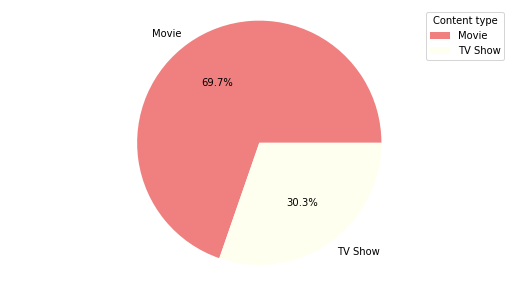

In [160]:
fig1, ax1 = plt.subplots()
ax1.pie(grouped['count'], labels= grouped[col], colors=["lightcoral", "ivory"], autopct = '%1.1f%%')
ax1.axis('equal')
plt.legend(title = 'Content type')
fig1.set_size_inches(9,5)
plt.show()

Movies account for almost 70% of Netflix shows and TV shows only takes 30%

### 2. Content over years

We want to know how many TV shows and movies are produced each year

In [161]:
d1 = df[df["type"] == "TV Show"]
d2 = df[df["type"] == "Movie"]

col = "release_year"
vc1 = d1[col].value_counts().reset_index()
vc1 = vc1.rename(columns = {col : "count", "index" : col})
vc1 = vc1.sort_values(col)

vc2 = d2[col].value_counts().reset_index()
vc2 = vc2.rename(columns = {col : "count", "index" : col})
vc2 = vc2.sort_values(col)

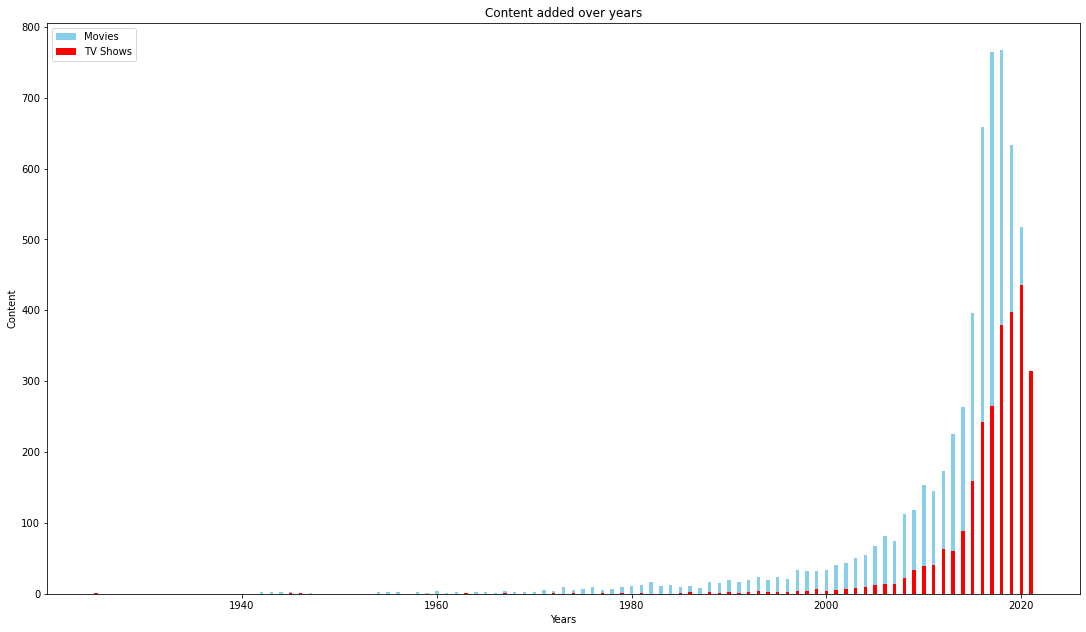

In [162]:
fig, ax = plt.subplots()

x = np.arange(4)
rects1 = plt.bar(x=vc2[col], height=vc2["count"], width = 0.35,label ="Movies", color ='skyblue')
rects2 = plt.bar(x=vc1[col], height=vc1["count"], width = 0.35, label ="TV Shows", color = 'r')
ax.set_ylabel('Content')
ax.set_xlabel('Years')
ax.set_title('Content added over years')
fig.set_size_inches(18.5, 10.5)
plt.legend()
plt.show()

### 3. Content over Months

We want to know how many TV shows and movies are added monthly.

I will add a new column to the dataset:

In [163]:
df["date_added"] = pd.to_datetime(df['date_added'])
df['month_added'] = df['date_added'].dt.month

In [164]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No data,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9
1,s2,TV Show,Blood & Water,No data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",No data,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9
3,s4,TV Show,Jailbirds New Orleans,No data,No data,No data,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9
4,s5,TV Show,Kota Factory,No data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9


We now have a new column called 'month_added'

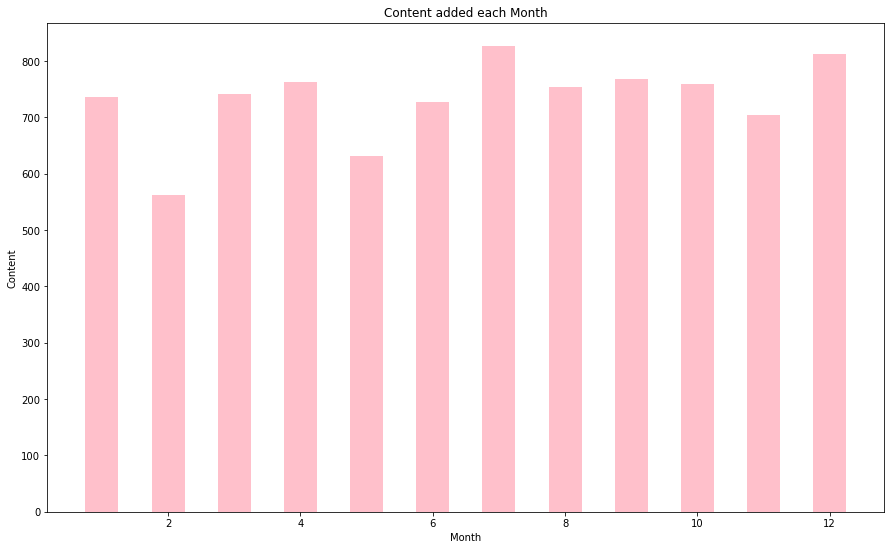

In [165]:
col = 'month_added'
vc1 = df[col].value_counts().reset_index()
vc1 = vc1.rename(columns = {col : "count", "index" : col})
vc1 = vc1.sort_values(col)

fig, ax = plt.subplots()
rects = plt.bar(x = vc1[col], height = vc1['count'], width = 0.5, color = 'pink')
fig.set_size_inches(15, 9)
ax.set_ylabel('Content')
ax.set_xlabel('Month')
ax.set_title('Content added each Month')
plt.show()

### 4. Content from Different Countries

We want to know where most content comes from

In [166]:
df['count']=1
data = df.groupby('country')['count'].sum().sort_values(ascending=False)[:10]
data

country
United States     2809
India              972
No data            829
United Kingdom     418
Japan              243
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Name: count, dtype: int64

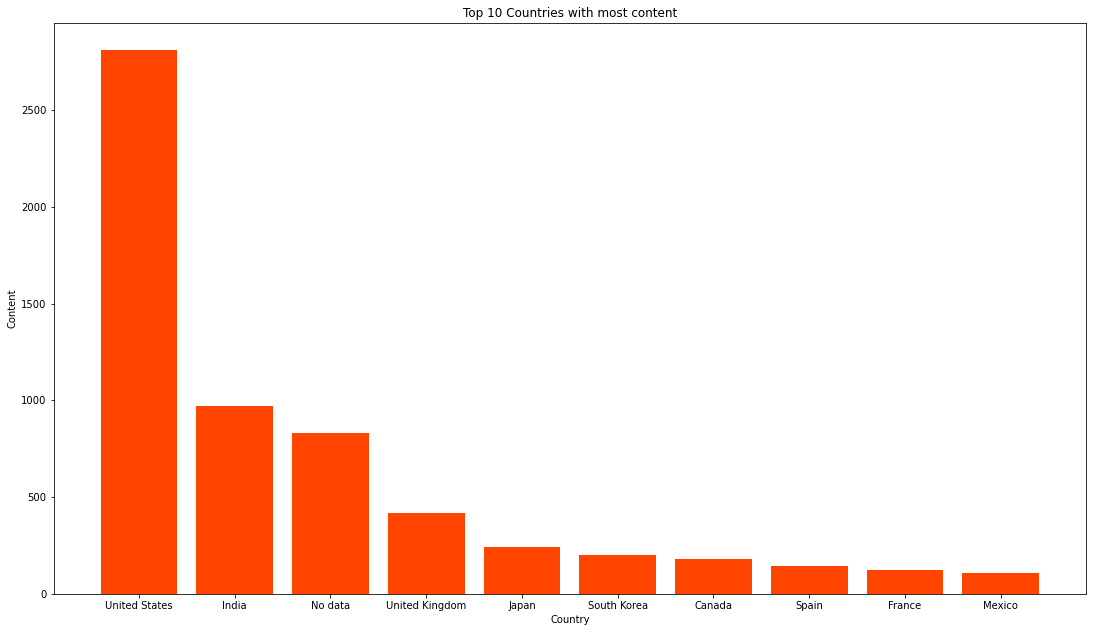

In [167]:
fig, ax = plt.subplots()

x = np.arange(10)
rects = plt.bar(data.index, data, width = 0.8, color = 'orangered')
fig.set_size_inches(18.5, 10.5)
ax.set_ylabel('Content')
ax.set_xlabel('Country')
ax.set_title('Top 10 Countries with most content')
plt.show()